# Demonstrate image compression using SVD

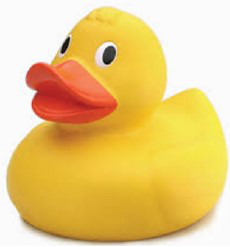

In [1]:
# ] add Images ImageMagick
using Images
using LinearAlgebra

img = load("./duck.jpg");
display(img)

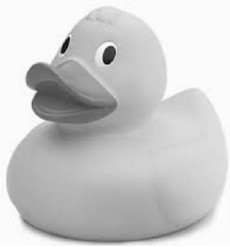

size of A = 247 x 230
storage   = 56810


In [2]:
display(Gray.(img))
# convert to a matrix
A=float64.(channelview(Gray.(img[:,:])))
println("size of A = ", size(A,1)," x ", size(A,2))
println("storage   = ", size(A,1) * size(A,2))

In [3]:
U, S, V = svd(A)
# check the accuracy of SVD
print("||USV'-A||=", norm(U*diagm(S)*V' - A))

||USV'-A||=3.866466999562912e-13

Compression rank = 1
Storage          = 477


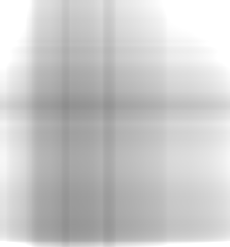

Compression rank = 5
Storage          = 2385


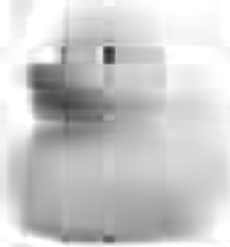

Compression rank = 10
Storage          = 4770


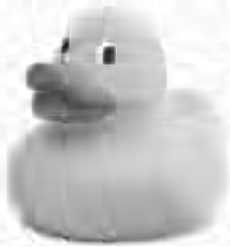

Compression rank = 20
Storage          = 9540


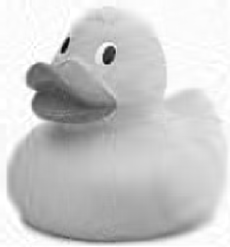

Compression rank = 30
Storage          = 14310

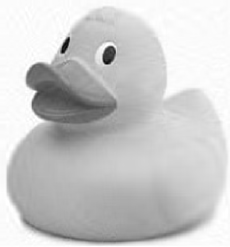


Compression rank = 40
Storage          = 19080


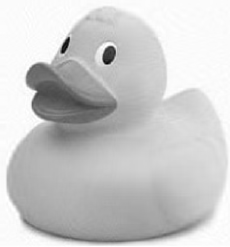

In [4]:
rank_list = [1,5,10,20,30,40]

for rank in rank_list
    
    Acompress = U[:,1:rank] * diagm(S[1:rank]) * V[:,1:rank]'

    println("Compression rank = ", rank)
    println("Storage          = ", (size(A,1)+size(A,2))*rank)

    flush(stdout)
    display(Gray.(Acompress))
end

Show the decay of the singular values


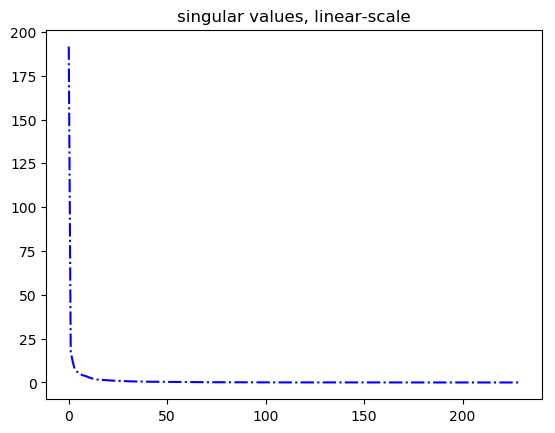

PyObject Text(0.5, 1.0, 'singular values, linear-scale')

In [10]:
using PyPlot
plot(S, "b-.")
title("singular values, linear-scale")

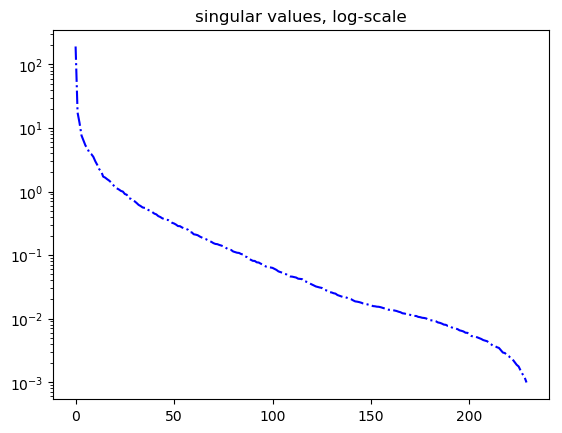

PyObject Text(0.5, 1.0, 'singular values, log-scale')

In [9]:
semilogy(S, "b-.")
title("singular values, log-scale")